In [137]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
diabetes = load_diabetes()

In [123]:
df_X = diabetes.data


df_y = diabetes.target

In [124]:
df_X = np.array(df_X)
df_y = np.array(df_y)

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 42)

In [126]:
W = np.random.rand(df_X.shape[1])
b = np.random.rand()

In [127]:
def model(X,W,b):
    predictions = 0
    # 열벡터인 X와 행벡터인 W간의 행렬 연산과 동일
    for i in range(X.shape[1]):
        predictions += X[:, i] * W[i]
    # bias는 한번 더하기
    predictions += b
    return predictions


In [128]:
def MSE(a,b):
    # 차이의 제곱을 평균낸 것
    mse = ((a-b) **2).mean()
    return mse

In [129]:
def Loss(X,w,b,y):
    predictions = model(X, W, b)
    L = MSE(predictions,y)
    return L

In [130]:
def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X,W,b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    
    db = 2 * (y_pred - y).mean()
    return dW, db

In [131]:
LEARNING_RATE = 0.1

In [132]:
losses = []

# 하이퍼파라미터 조정을 위한 데이터 초기화
W = np.random.rand(df_X.shape[1])
b = np.random.rand()

# epoch 설정
epoch = 5000

for i in range (1, epoch):
	# gradient 계산
	dW, db = gradient(X_train, W, b, y_train)
	
	# W와 b에 대해 gradient decent 수행
	W -= LEARNING_RATE * dW
	b -= LEARNING_RATE * db
	
	# loss의 기록 남기기
	L = Loss(X_train, W, b, y_train)
	losses.append(L)
	
	if i % 10 == 0:
		print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6260.4988
Iteration 20 : Loss 5915.6673
Iteration 30 : Loss 5838.8350
Iteration 40 : Loss 5767.3513
Iteration 50 : Loss 5698.1116
Iteration 60 : Loss 5631.0060
Iteration 70 : Loss 5565.9619
Iteration 80 : Loss 5502.9095
Iteration 90 : Loss 5441.7815
Iteration 100 : Loss 5382.5128
Iteration 110 : Loss 5325.0408
Iteration 120 : Loss 5269.3050
Iteration 130 : Loss 5215.2469
Iteration 140 : Loss 5162.8101
Iteration 150 : Loss 5111.9403
Iteration 160 : Loss 5062.5849
Iteration 170 : Loss 5014.6932
Iteration 180 : Loss 4968.2164
Iteration 190 : Loss 4923.1071
Iteration 200 : Loss 4879.3198
Iteration 210 : Loss 4836.8105
Iteration 220 : Loss 4795.5368
Iteration 230 : Loss 4755.4576
Iteration 240 : Loss 4716.5334
Iteration 250 : Loss 4678.7260
Iteration 260 : Loss 4641.9984
Iteration 270 : Loss 4606.3152
Iteration 280 : Loss 4571.6419
Iteration 290 : Loss 4537.9453
Iteration 300 : Loss 4505.1935
Iteration 310 : Loss 4473.3555
Iteration 320 : Loss 4442.4015
Iteration 330 : L

Iteration 3360 : Loss 2958.0018
Iteration 3370 : Loss 2957.5080
Iteration 3380 : Loss 2957.0186
Iteration 3390 : Loss 2956.5336
Iteration 3400 : Loss 2956.0529
Iteration 3410 : Loss 2955.5766
Iteration 3420 : Loss 2955.1044
Iteration 3430 : Loss 2954.6365
Iteration 3440 : Loss 2954.1728
Iteration 3450 : Loss 2953.7132
Iteration 3460 : Loss 2953.2577
Iteration 3470 : Loss 2952.8062
Iteration 3480 : Loss 2952.3588
Iteration 3490 : Loss 2951.9154
Iteration 3500 : Loss 2951.4758
Iteration 3510 : Loss 2951.0402
Iteration 3520 : Loss 2950.6085
Iteration 3530 : Loss 2950.1806
Iteration 3540 : Loss 2949.7564
Iteration 3550 : Loss 2949.3361
Iteration 3560 : Loss 2948.9194
Iteration 3570 : Loss 2948.5064
Iteration 3580 : Loss 2948.0971
Iteration 3590 : Loss 2947.6914
Iteration 3600 : Loss 2947.2893
Iteration 3610 : Loss 2946.8907
Iteration 3620 : Loss 2946.4957
Iteration 3630 : Loss 2946.1041
Iteration 3640 : Loss 2945.7159
Iteration 3650 : Loss 2945.3312
Iteration 3660 : Loss 2944.9499
Iteratio

In [133]:
prediction = model(X_test, W, b)
mse = Loss(X_test, W, b, y_test)
print(f"MSE: {mse}")

MSE: 2867.0014171313946


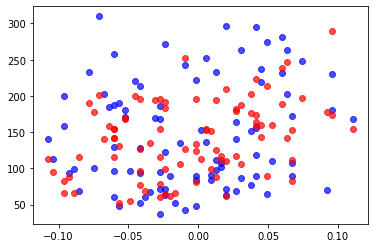

In [139]:
plt.scatter(X_test[:, 0], y_test, label="target", alpha=0.7, color='blue')  
plt.scatter(X_test[:, 0], prediction, label="prediction", alpha=0.7, color='red')  
plt.show()